# import files and library

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File reading

In [178]:
wildfire_csv="usaWildfireDataset.csv"

try:
    wildfire_main_df = pd.read_csv(wildfire_csv)
    
except FileNotFoundError:
        print('File not found!!')

In [179]:
print("---------Wildfire CSV file info--------\n")
print(wildfire_main_df.info())

---------Wildfire CSV file info--------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        55367 non-null  int64  
 1   Unnamed: 0.1      55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16 

In [182]:
print("Removing column that are not important for analysis \n")
wildfire_main_df = wildfire_main_df.drop(['Unnamed: 0', 'Unnamed: 0.1','weather_file','fire_name',
                                    'cont_clean_date','disc_date_final','cont_date_final'], axis = 1)

Removing column that are not important for analysis 



# Exploratory data analysis

In [183]:
wildfire_main_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fire_size,55367.0,2104.645161,14777.005364,0.510000,1.200000,4.000000,20.000000,606945.000000
latitude,55367.0,36.172866,6.724348,17.956533,32.265960,34.600000,38.975235,69.849500
longitude,55367.0,-94.757971,15.878194,-165.936000,-102.541513,-91.212359,-82.847500,-65.285833
disc_pre_year,55367.0,2003.765474,6.584889,1991.000000,1999.000000,2005.000000,2009.000000,2015.000000
dstation_m,55367.0,40256.474678,25272.081410,6.166452,21373.361515,35621.334820,53985.904315,224153.661800
wstation_wban,55367.0,61029.607311,40830.393541,100.000000,13927.000000,73803.000000,99999.000000,99999.000000
wstation_byear,55367.0,1979.341900,23.372803,1931.000000,1973.000000,1978.000000,2004.000000,2014.000000
wstation_eyear,55367.0,2015.480990,6.767851,1993.000000,2010.000000,2020.000000,2020.000000,2020.000000
Vegetation,55367.0,11.066068,5.595719,0.000000,9.000000,12.000000,15.000000,16.000000
fire_mag,55367.0,9.414366,26.820363,0.100000,0.100000,0.100000,1.000000,100.000000


## Distribution of Wildfire by class

In [184]:
df_size = wildfire_main_df[['fire_size']]
df_size =df_size.sort_values("fire_size")

# Determine mean value
df_size["fire_size"].mean()

2104.6451608947564

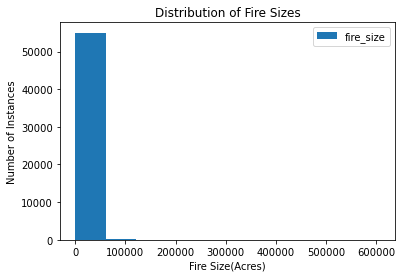

In [185]:
df_size.plot(kind="hist")
plt.title('Distribution of Fire Sizes')
plt.xlabel('Fire Size(Acres)')
plt.ylabel('Number of Instances')
plt.show()

### We see that the above histogram isn't very useful. What if we take advantage of the 'fire_size_class'?

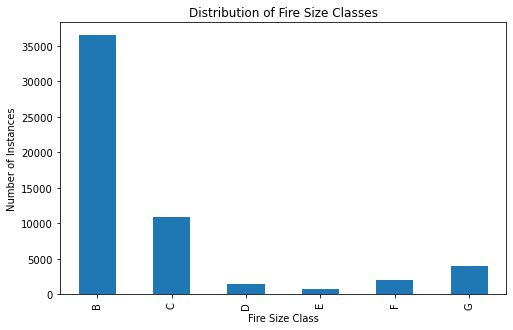

In [186]:
# Bar plot with FIRE_SIZE_CLASS grouping
df_size_class = wildfire_main_df[['fire_size_class']]
df_size_class.groupby('fire_size_class').size().plot(kind='bar', figsize=(8,5))
plt.title('Distribution of Fire Size Classes')
plt.xlabel('Fire Size Class')
plt.ylabel('Number of Instances')
plt.show()

### We see that the above graph is far more valuable, with most fires being classified as either 'B' or 'C', corresponding to fire sizes between 0 and 10 acres

## What cause the wildfire?

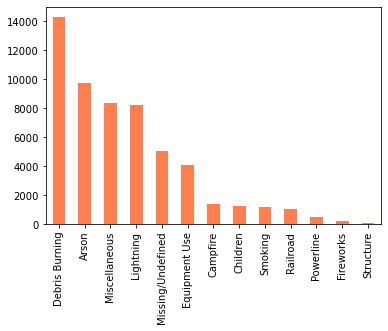

In [187]:
wildfire_main_df['stat_cause_descr'].value_counts().plot(kind='bar',color='coral')
plt.show()

# Correlation

In [188]:
wildfire_main_df.corr()

,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
fire_size,1.000000,0.220566,-0.246127,0.040481,0.110245,0.012108,-0.000081,0.005503,-0.081249,0.460962,...,0.059138,-0.035904,-0.031593,-0.032207,0.029605,-0.025233,-0.021311,-0.015649,-0.022094,0.084714
latitude,0.220566,1.000000,-0.548395,0.037289,0.171838,0.067105,0.072509,-0.016927,-0.266045,0.342593,...,0.023216,-0.005020,0.013621,0.014254,-0.004123,-0.019765,-0.015033,-0.006647,-0.057070,0.353782
longitude,-0.246127,-0.548395,1.000000,-0.060526,-0.196979,-0.094929,-0.023803,0.009530,0.219895,-0.451987,...,-0.141664,0.065244,0.053026,0.052392,-0.056728,0.088963,0.075495,0.053762,0.083052,-0.788935
disc_pre_year,0.040481,0.037289,-0.060526,1.000000,-0.143213,0.042653,0.441334,0.483671,-0.037401,0.061060,...,0.120813,0.228329,0.211810,0.206313,0.098155,-0.021112,-0.023975,-0.013720,0.005063,0.048916
dstation_m,0.110245,0.171838,-0.196979,-0.143213,1.000000,-0.024851,-0.149664,-0.041490,-0.027406,0.198441,...,-0.003621,-0.065698,-0.058581,-0.057392,-0.029323,0.008011,0.012331,0.010763,-0.013431,0.093730
wstation_wban,0.012108,0.067105,-0.094929,0.042653,-0.024851,1.000000,0.078182,0.034747,0.010884,0.028378,...,-0.042518,-0.100901,-0.095448,-0.094477,-0.060752,-0.093525,-0.086200,-0.066664,-0.101213,0.091803
wstation_byear,-0.000081,0.072509,-0.023803,0.441334,-0.149664,0.078182,1.000000,0.080723,-0.032766,0.001321,...,0.028377,0.093607,0.083124,0.079848,0.027084,-0.030611,-0.030214,-0.024853,0.004194,0.030474
wstation_eyear,0.005503,-0.016927,0.009530,0.483671,-0.041490,0.034747,0.080723,1.000000,0.009174,0.004023,...,0.067741,0.181627,0.169236,0.163208,0.073855,0.011286,0.010782,0.006665,0.010252,-0.006251
Vegetation,-0.081249,-0.266045,0.219895,-0.037401,-0.027406,0.010884,-0.032766,0.009174,1.000000,-0.120112,...,-0.027934,0.027834,0.020076,0.018913,-0.029746,0.021551,0.013973,0.006254,0.023878,-0.188057
fire_mag,0.460962,0.342593,-0.451987,0.061060,0.198441,0.028378,0.001321,0.004023,-0.120112,1.000000,...,0.168256,-0.080933,-0.070779,-0.070109,0.065556,-0.051611,-0.043810,-0.032494,-0.045619,0.117559


# Correlation matrix

# Data Cleaning

---------Wildfire CSV file info--------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        55367 non-null  int64  
 1   Unnamed: 0.1      55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16 

In [135]:
print('\nCheck the number of null values in  each columns \n')
print(wildfire_main_df.isnull().sum())


Check the number of null values in  each columns 

Unnamed: 0              0
Unnamed: 0.1            0
fire_name           29454
fire_size               0
fire_size_class         0
stat_cause_descr        0
latitude                0
longitude               0
state                   0
disc_clean_date         0
cont_clean_date     27890
discovery_month         0
disc_date_final     26659
cont_date_final     29735
putout_time         27890
disc_date_pre           0
disc_pre_year           0
disc_pre_month          0
wstation_usaf           0
dstation_m              0
wstation_wban           0
wstation_byear          0
wstation_eyear          0
Vegetation              0
fire_mag                0
weather_file            0
Temp_pre_30             0
Temp_pre_15             0
Temp_pre_7              0
Temp_cont               0
Wind_pre_30             0
Wind_pre_15             0
Wind_pre_7              0
Wind_cont               0
Hum_pre_30              0
Hum_pre_15              0
Hum_pre_7   

In [136]:
print("Removing column that are not important for analysis: \n")
wildfire_df = wildfire_main_df.drop(['Unnamed: 0', 'Unnamed: 0.1','weather_file','fire_name',
                                    'cont_clean_date','disc_date_final','cont_date_final'], axis = 1)

Removing column that are not important for analysis: 



In [137]:
print("Total number of duplicates in dataframe:\t",wildfire_df.duplicated().sum())

Total number of duplicates in dataframe:	 4


In [138]:
wildfire_df=wildfire_df.drop_duplicates(inplace=False).reset_index(drop=True)
print("----- wildfire_df after removing duplicates-----\n")

----- wildfire_df after removing duplicates-----



In [139]:
wildfire_df

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,putout_time,disc_date_pre,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,Feb,NaN,1/12/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,Dec,NaN,11/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,Feb,NaN,1/30/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,Jun,0 days 00:00:00.000000000,5/7/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,Sep,NaN,8/23/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55358,6289.0,G,Missing/Undefined,39.180000,-96.784167,KS,10/15/2015,Oct,NaN,9/15/2015,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55359,70868.0,G,Missing/Undefined,38.342719,-120.695967,CA,9/9/2015,Sep,22,8/10/2015,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55360,5702.0,G,Arson,37.262607,-119.511139,CA,7/25/2015,Jul,NaN,6/25/2015,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55361,3261.0,F,Miscellaneous,40.604300,-123.080450,CA,7/31/2015,Jul,43,7/1/2015,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [102]:
# Bar plot with FIRE_SIZE_CLASS grouping
#df_outout_time = wildfire_df[['putout_time']]
#df_outout_time.groupby('putout_time').size().plot(kind='bar', figsize=(50,30))
#df_outout_time.plot(kind="hist")
#plt.title('Distribution of putout_time')
#plt.xlabel('putout_time')
#plt.ylabel('Number of Instances')
#plt.ylim([0, 100])
#plt.show()

# filtering the putout_time column values

In [140]:
#check how to replace the nan value with mean/median! below function is not working
#putout_time_mean = wildfire_df['putout_time'].mean()
#putout_time_mean
#replace nan or blank value with -1 int , and convert all the type into int datatype

def filter_col_value(col_name, df):
    
    for (columnName, columnData) in df.iteritems():
    
        if columnName == col_name:
            for val in range(0, len(columnData.values)):
                v = columnData.values[val]
                if isinstance(columnData.values[val], float):
                    columnData.values[val] = -1
                else:
                    v = v.split(" ")[0]
                    columnData.values[val] = int(v)
            print(columnData.values)

In [141]:

filter_col_value('putout_time', wildfire_df)


[-1 -1 -1 ... -1 43 -1]


In [142]:

#wildfire_df.drop(wildfire_df.loc[wildfire_df['putout_time']==-1].index, inplace=True)

In [143]:
wildfire_df.corr()

,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
fire_size,1.000000,0.220573,-0.246147,0.040474,0.110241,0.012105,-0.000082,0.005492,-0.081277,0.460960,...,0.059142,-0.035904,-0.031592,-0.032207,0.029607,-0.025232,-0.021309,-0.015651,-0.022088,0.084726
latitude,0.220573,1.000000,-0.548437,0.037304,0.171860,0.067106,0.072513,-0.016885,-0.266037,0.342607,...,0.023232,-0.005026,0.013616,0.014255,-0.004106,-0.019776,-0.015052,-0.006642,-0.057106,0.353811
longitude,-0.246147,-0.548437,1.000000,-0.060630,-0.197064,-0.094933,-0.023798,0.009481,0.219848,-0.452027,...,-0.141684,0.065188,0.052977,0.052350,-0.056733,0.088939,0.075465,0.053759,0.083068,-0.788909
disc_pre_year,0.040474,0.037304,-0.060630,1.000000,-0.143305,0.042638,0.441355,0.483666,-0.037545,0.061040,...,0.120834,0.228314,0.211800,0.206306,0.098173,-0.021132,-0.023996,-0.013732,0.005139,0.049032
dstation_m,0.110241,0.171860,-0.197064,-0.143305,1.000000,-0.024864,-0.149672,-0.041574,-0.027522,0.198429,...,-0.003617,-0.065726,-0.058604,-0.057412,-0.029322,0.008000,0.012322,0.010754,-0.013370,0.093817
wstation_wban,0.012105,0.067106,-0.094933,0.042638,-0.024864,1.000000,0.078170,0.034770,0.010836,0.028369,...,-0.042464,-0.100871,-0.095414,-0.094441,-0.060708,-0.093529,-0.086204,-0.066669,-0.101118,0.091810
wstation_byear,-0.000082,0.072513,-0.023798,0.441355,-0.149672,0.078170,1.000000,0.080736,-0.032787,0.001317,...,0.028390,0.093624,0.083141,0.079863,0.027094,-0.030608,-0.030209,-0.024854,0.004227,0.030471
wstation_eyear,0.005492,-0.016885,0.009481,0.483666,-0.041574,0.034770,0.080736,1.000000,0.009024,0.003996,...,0.067725,0.181615,0.169225,0.163199,0.073846,0.011285,0.010786,0.006652,0.010433,-0.006190
Vegetation,-0.081277,-0.266037,0.219848,-0.037545,-0.027522,0.010836,-0.032787,0.009024,1.000000,-0.120171,...,-0.027910,0.027836,0.020084,0.018920,-0.029731,0.021550,0.013980,0.006234,0.024108,-0.187987
fire_mag,0.460960,0.342607,-0.452027,0.061040,0.198429,0.028369,0.001317,0.003996,-0.120171,1.000000,...,0.168267,-0.080933,-0.070777,-0.070109,0.065561,-0.051611,-0.043807,-0.032498,-0.045601,0.117582


In [73]:
#fig = plt.figure(figsize = (20, 14))
#title = fig.suptitle("State Wise Wildfire Frequency Distribution ", fontsize=14)
#fig.subplots_adjust(top=0.85, wspace=0.3)

#ax = fig.add_subplot(1,1, 1)
#ax.grid(axis='y', alpha=0.75)
#ax.set_xlabel('Putout Time')
#ax.set_ylabel('Frequency')
#ax.set_ylim([0, 4500])
#ax.set_xlim([-1, 400])
#ax.hist(x=putout_time, bins=20, color='orange',alpha=0.7, rwidth=0.75)


## Outlier :

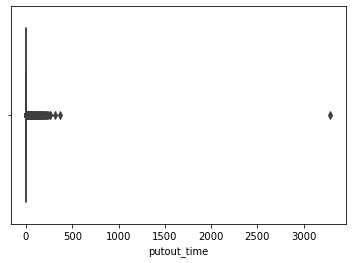

In [144]:
sns.boxplot(wildfire_df['putout_time']) 

### As we can see, for putout_time the boxplot shows that there are less to no outlier present , so we replace all the null/-1/0 with mean value

In [145]:
putout_time_mean = wildfire_df['putout_time'].mean()
putout_time_mean

2.49079710275816

In [146]:
wildfire_df["putout_time"].replace({-1:putout_time_mean, 0 : putout_time_mean}, inplace=True)

### lets see boxplot again after replacing the values

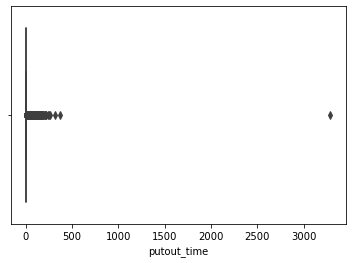

In [150]:
sns.boxplot(wildfire_df['putout_time']) 

In [ ]:
#for i in wildfire_df.drop(['fire_size_class','stat_cause_descr','state','discovery_month','disc_clean_date','disc_date_pre','disc_pre_year','disc_pre_month','wstation_eyear','wstation_byear'], axis=1).columns: 
    #plt.figure(figsize=(8,4))              
    #sns.boxplot(wildfire_df.drop(['fire_size_class','stat_cause_descr','state','discovery_month','disc_clean_date','disc_date_pre','disc_pre_year','disc_pre_month','wstation_eyear','wstation_byear'], axis=1)[i])
    #plt.show()

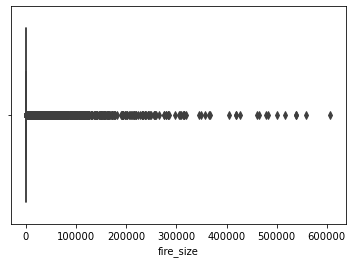

In [151]:
sns.boxplot(wildfire_df['fire_size']) 


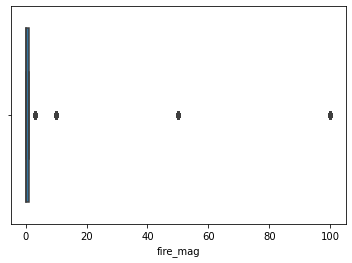

In [153]:
sns.boxplot(wildfire_df['fire_mag'])

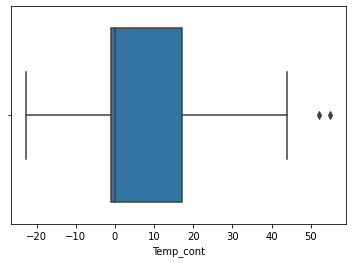

In [154]:
sns.boxplot(wildfire_df['Temp_cont'])

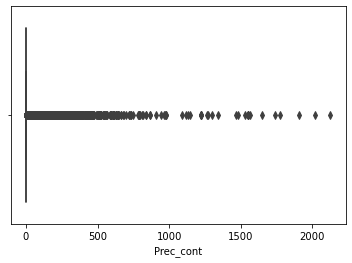

In [155]:
sns.boxplot(wildfire_df['Prec_cont'])

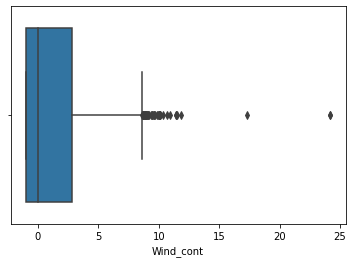

In [156]:
sns.boxplot(wildfire_df['Wind_cont'])

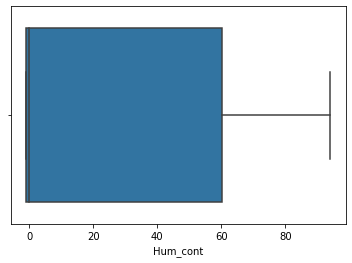

In [157]:
sns.boxplot(wildfire_df['Hum_cont'])

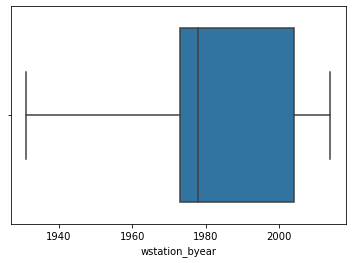

In [158]:
sns.boxplot(wildfire_df['wstation_byear'])

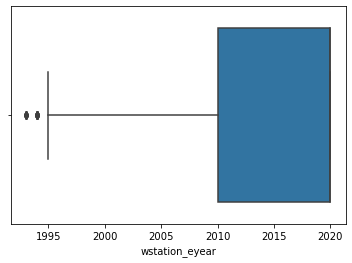

In [159]:
sns.boxplot(wildfire_df['wstation_eyear'])

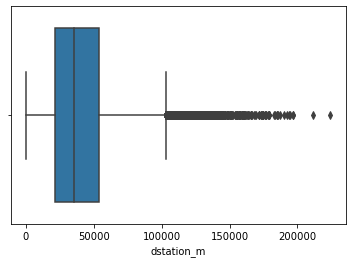

In [160]:
sns.boxplot(wildfire_df['dstation_m'])

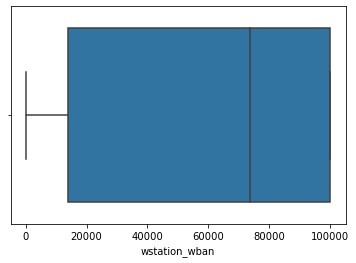

In [161]:
sns.boxplot(wildfire_df['wstation_wban'])

# What is Regerssion Analysis  and why it is used.
    Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables)
    
    The reason I choose Regression analysis is that Regression analysis is a reliable method of identifying which variables have impact on a topic of interest. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other.
    
    So , here I am using regression method to find out how the wind speed afects the fire to grow! , do wind speed impact the  fire to magnify
    In this case the dependent variable is fire_size and independent variable is wind_cont

### Following are the basic steps to do the Regression Analysis: Using sklearn.linear_model, 

    1) Import the packages and classes you need.
    2) Provide data to work with and eventually do appropriate transformations.
    3) Create a regression model and fit it with existing data.
    4) Check the results of model fitting to know whether the model is satisfactory.
    5) Apply the model for predictions.

## step 1:
    import the package numpy(we have already included the numpy) and the class LinearRegression from sklearn.linear_model:

In [89]:
from sklearn.linear_model import LinearRegression

## step 2:
    defining data to work with, the dependent and indepedent variable
        wind_cont : wind in m/s at the location of fire upto day the fire was contained
        fire_size : Size of Fire 
    The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects.

In [90]:
x_wind_cont = np.array(wildfire_df['Wind_cont']).reshape((-1,1))
y_fire_size = np.array(wildfire_df['fire_size'])

print("This is how the data look now:\n")
print("\nx_wind_cont:\n",x_wind_cont)
print("\ny_fire_size:\n",y_fire_size)

This is how the data look now:


x_wind_cont:
 [[ 3.25041322]
 [ 2.1223203 ]
 [ 3.36905041]
 ...
 [ 2.52915767]
 [-1.        ]
 [ 1.20807292]]

y_fire_size:
 [1.0000e+01 3.0000e+00 6.0000e+01 ... 5.7020e+03 3.2610e+03 7.6067e+04]


## Step 3:
    create a linerar regression model and fit it using the data we have 
    With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. That’s why you can replace the last two statements with this one:

In [91]:
reg_model= LinearRegression().fit(x_wind_cont,y_fire_size)

## Step 4:
    Once we have our model fitted the next is to get the result to check whether the model works satisfactorily and interpret it 

In [92]:
# obtained the coefficient of determination (𝑅²) with .score() called on model:
r_sq = reg_model.score(x_wind_cont,y_fire_size)
print("coefficient of determination", r_sq)

coefficient of determination 0.003497800251439309


In [166]:
print("""We can see that coefficient of determination r_sq means: 0.0034 , 
      which mean that fire_size is not affected by the only factore wind""")

We can see that coefficient of determination r_sq means: 0.0034 , 
      which mean that fire_size is not affected by the only factore wind


In [94]:
# The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:
print('intercept:', reg_model.intercept_)
print('slope:', reg_model.coef_)

intercept: 1617.4691903062196
slope: [430.40163856]


    The value 𝑏₀ = 1617.4691 (approximately) illustrates that your model predicts the response 1617.4691 when 𝑥 is zero. The value 𝑏₁ = 430.4016 means that the predicted response rises by 430.4016 when 𝑥 is increased by one.

## step 5:
    Once there is a satisfactory model, you can use it for predictions with either existing or new data.

    To obtain the predicted response, use .predict():

In [95]:
# predict the result
y_pred = reg_model.predict(x_wind_cont)
print('predicted response:', y_pred, sep='\n')

predicted response:
[3016.45236748 2530.91932626 3067.51400716 ... 2706.02279435 1187.06755175
 2137.42575328]


In [96]:
# the above result can be obatin by doing the below code
y_pred = reg_model.intercept_ + reg_model.coef_ * x_wind_cont
print('predicted response:', y_pred, sep='\n')

predicted response:
[[3016.45236748]
 [2530.91932626]
 [3067.51400716]
 ...
 [2706.02279435]
 [1187.06755175]
 [2137.42575328]]
